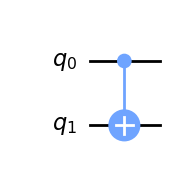

In [2]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(2)

circ.cx(0, 1)


circ.draw("mpl")

In [1]:
import numpy as np
import qiskit as qk
import pickle as pk
import qutip as qt
import matplotlib.pyplot as plt
import copy
import random
import cmath
from datetime import datetime
from math import pi
from qiskit import Aer
from qiskit.quantum_info.operators import Operator
from math import cos, sin, pi, exp
from qiskit import QuantumCircuit, transpile, assemble

from qiskit.quantum_info.operators import Operator, Pauli
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit_ibm_provider import IBMProvider
%matplotlib inline

In [5]:
from qiskit import transpile, schedule as build_schedule
from qiskit.providers.fake_provider import FakeHanoi

#backend = FakeHanoi()

transpiled_circ = transpile(circ, backend)
schedule = build_schedule(transpiled_circ, backend)

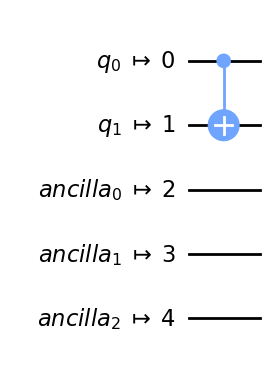

In [6]:
transpiled_circ.draw("mpl")

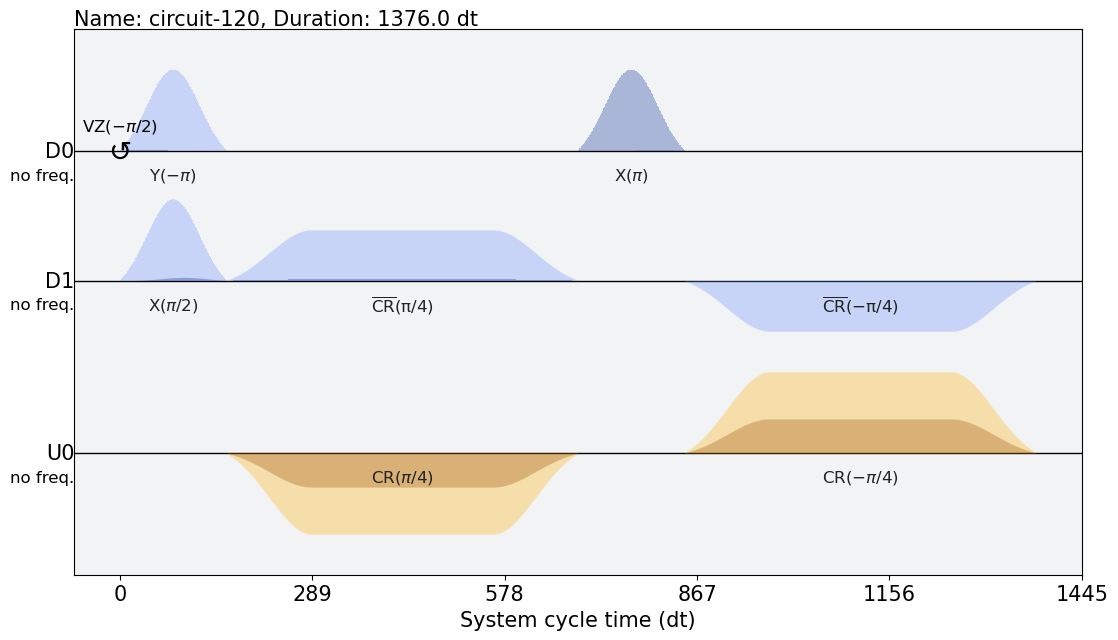

In [10]:
schedule.draw()

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit import IBMQ
from qiskit.visualization import SchedStyle
import numpy as np

token = '1ea127d77db5ded729da86b734cd00aee46e09a897dae34eca01882ea1fed1f750298c01b855d8a419c4015fb87f6d38b7c40bc6854f78060128f75740d6b3f5'
try:
    IBMQ.load_account()
except:
    qk.IBMQ.save_account(token=token)
    qk.IBMQ.enable_account(token)
provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
backend = provider.get_backend('ibmq_lima')





C:\Users\celia\AppData\Local\Temp\ipykernel_42696\594142148.py:8: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\celia\AppData\Local\Temp\ipykernel_42696\594142148.py:8: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()
configrc.store_credentials:WARNING:2023-09-19 17:13:42,714: Credentials already present. Set overwrite=True

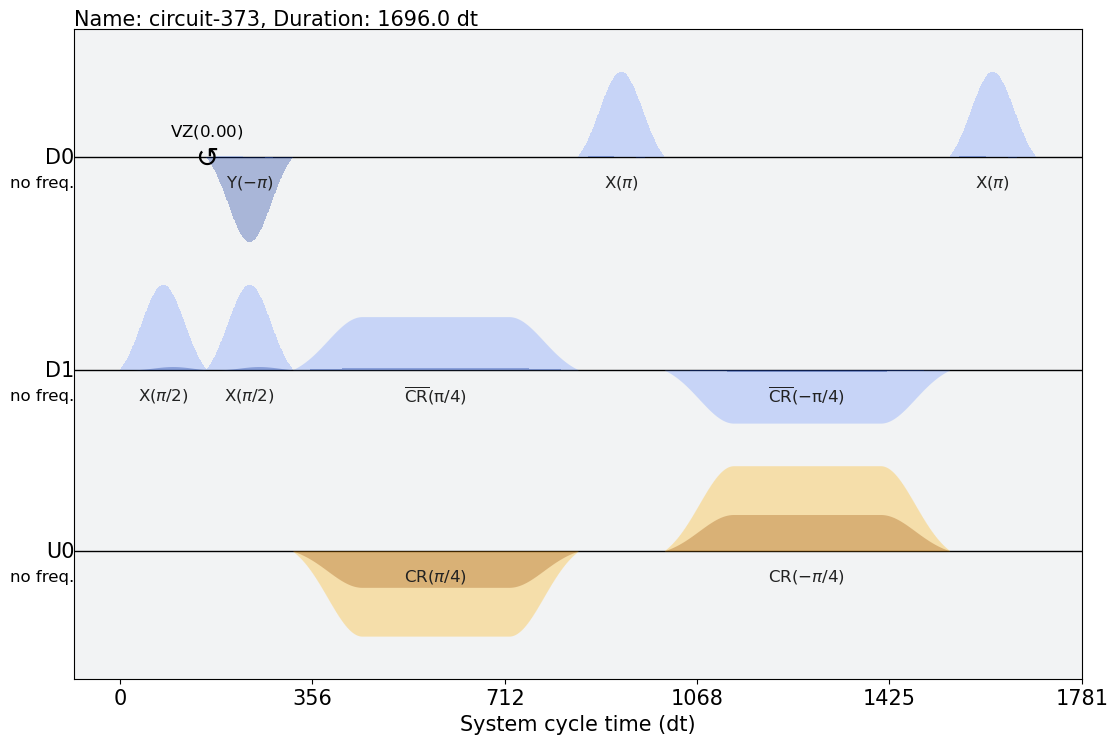

In [63]:
circ = qk.QuantumCircuit(2)
circ.ecr(0,1)

transpiled_circ = transpile(circ, backend, optimization_level = 1)

schedule = build_schedule(transpiled_circ, backend)
schedule.draw()

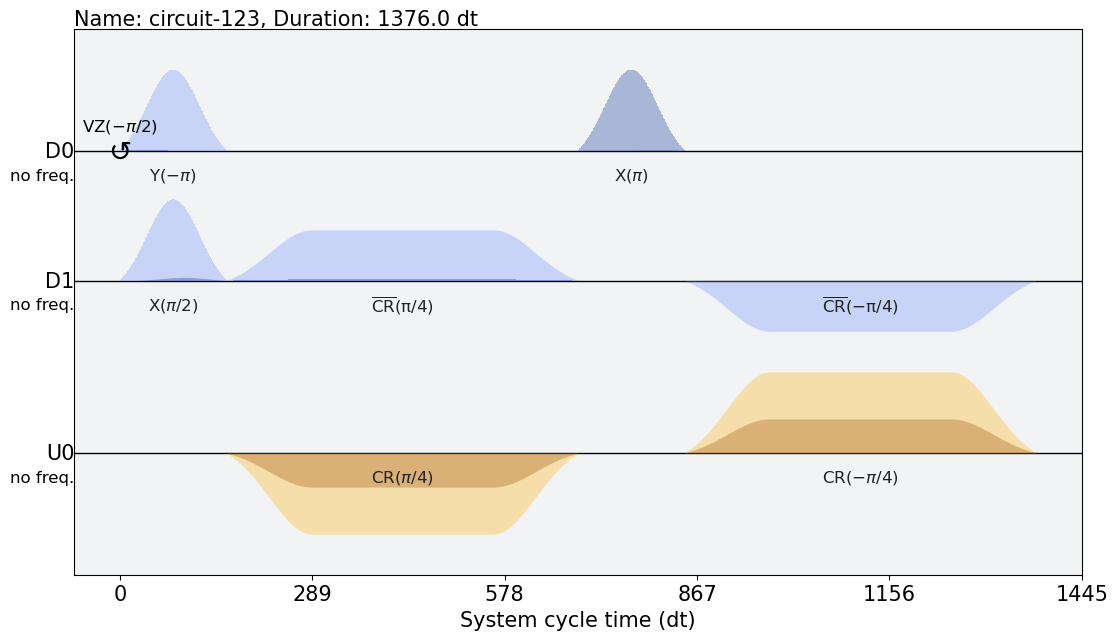

In [11]:
circ = qk.QuantumCircuit(2)
circ.cx(0,1)

transpiled_circ = transpile(circ, backend, optimization_level = 1)

schedule = build_schedule(transpiled_circ, backend)
schedule.draw()

In [45]:
# Create a quantum circuit with a CNOT gate
qc = QuantumCircuit(2)
qc.cx(0, 1)

# Compile the circuit
compiled_circuit = transpile(qc, backend=backend, optimization_level=0)  # Use optimization_level=0 to preserve gate names

# Access the pulse schedule from the gate's schedule map
gate_schedule_map = backend.defaults().instruction_schedule_map

cnot_schedule = gate_schedule_map.get('cx', [1, 2])

print(gate_schedule_map)

print(cnot_schedule)

# Print pulse parameters for each instruction in the pulse schedule
#for idx, inst in enumerate(cnot_schedule.instructions):
    #print(f"Instruction {idx}:", inst.name)
    #print("Pulse Parameters:")
    #for pname, param in inst.pulse.parameters.items():
        #print(f"{pname}: {param}")
    #print("Waveform:")
    #waveform = np.array(inst.pulse.samples)
    #print(waveform)
    #print("-" * 40)

<InstructionScheduleMap(1Q instructions:
  q0: {'u1', 'u2', 'x', 'id', 'rz', 'u3', 'sx', 'measure'}
  q1: {'u1', 'u2', 'x', 'id', 'rz', 'u3', 'sx', 'measure'}
  q2: {'u1', 'u2', 'x', 'id', 'rz', 'u3', 'sx', 'measure'}
  q3: {'u1', 'u2', 'x', 'id', 'rz', 'u3', 'sx', 'measure'}
  q4: {'u1', 'u2', 'x', 'id', 'rz', 'u3', 'sx', 'measure'}
Multi qubit instructions:
  (0, 1): {'cx'}
  (1, 0): {'cx'}
  (1, 2): {'cx'}
  (1, 3): {'cx'}
  (2, 1): {'cx'}
  (3, 1): {'cx'}
  (3, 4): {'cx'}
  (4, 3): {'cx'}
  (0, 1, 2, 3, 4): {'measure'}
)>
Schedule((0, ShiftPhase(-3.141592653589793, DriveChannel(1))), (0, ShiftPhase(-1.5707963267948966, DriveChannel(2))), (0, ShiftPhase(-3.141592653589793, ControlChannel(0))), (0, ShiftPhase(-1.5707963267948966, ControlChannel(2))), (0, ShiftPhase(-3.141592653589793, ControlChannel(4))), (0, ShiftPhase(-3.141592653589793, ControlChannel(5))), (0, Play(Drag(duration=160, sigma=40, beta=-0.8055251607588227, amp=0.07217333165853902, angle=1.6058779104660585, name='Y90p

# Manual Creation of CNOT Pulse Schedule

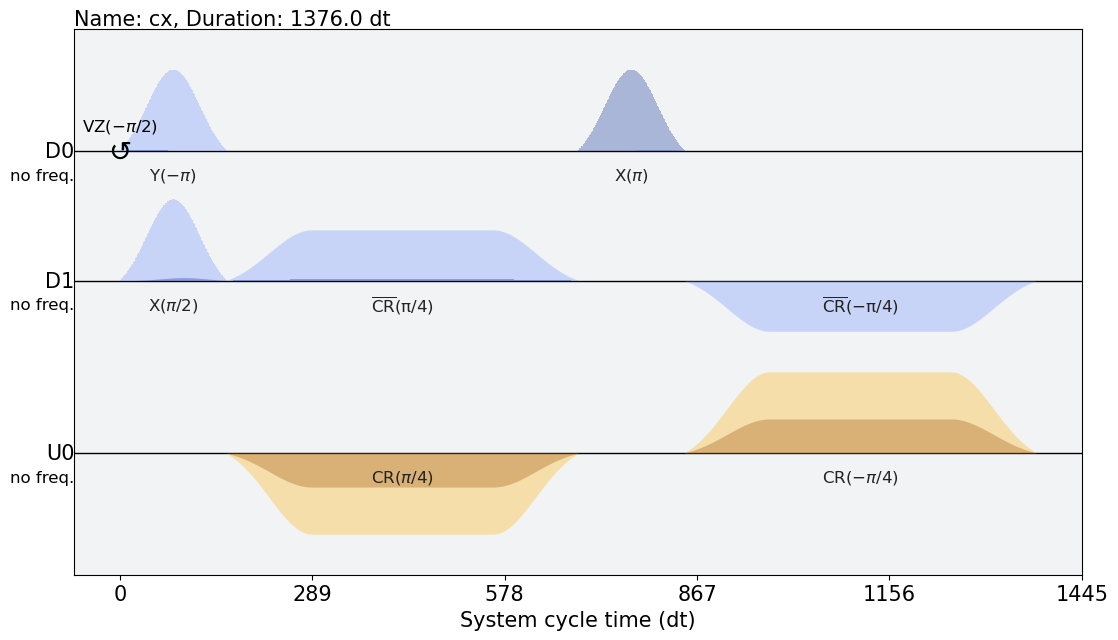

In [19]:
from qiskit import pulse


schedule = pulse.Schedule(
    (0, pulse.ShiftPhase(1.5707963267948966, pulse.DriveChannel(0))),
    (0, pulse.ShiftPhase(1.5707963267948966, pulse.ControlChannel(1))),
    (0, pulse.Play(pulse.Drag(duration=160, sigma=40, beta=0.6134080175073432, amp=0.11930849153565498, angle=-1.5707963267948968, name='Ym_d0'), pulse.DriveChannel(0), name='Ym_d0')),
    (0, pulse.Play(pulse.Drag(duration=160, sigma=40, beta=-0.7253644338052706, amp=0.07218089230552117, angle=0.033088254635327934, name='X90p_d1'), pulse.DriveChannel(1), name='X90p_d1')),
    (160, pulse.Play(pulse.GaussianSquare(duration=528, sigma=64, width=272, amp=0.04508032394765369, angle=0.024609105271036186, name='CR90p_d1_u0'), pulse.DriveChannel(1), name='CR90p_d1_u0')),
    (160, pulse.Play(pulse.GaussianSquare(duration=528, sigma=64, width=272, amp=0.480227045329668, angle=-2.7443844210941206, name='CR90p_u0'), pulse.ControlChannel(0), name='CR90p_u0')),
    (688, pulse.Play(pulse.Drag(duration=160, sigma=40, beta=0.6134080175073432, amp=0.11930849153565498, angle=0.0, name='Xp_d0'), pulse.DriveChannel(0), name='Xp_d0')),
    (848, pulse.Play(pulse.GaussianSquare(duration=528, sigma=64, width=272, amp=0.04508032394765369, angle=-3.1169835483187573, name='CR90m_d1_u0'), pulse.DriveChannel(1), name='CR90m_d1_u0')),
    (848, pulse.Play(pulse.GaussianSquare(duration=528, sigma=64, width=272, amp=0.4802270453296679, angle=0.39720823249567255, name='CR90m_u0'), pulse.ControlChannel(0), name='CR90m_u0')),
    name="cx"
)






schedule.draw()




# Manual Creation of Inverse CNOT Pulse Schedule

# flipping amplitudes

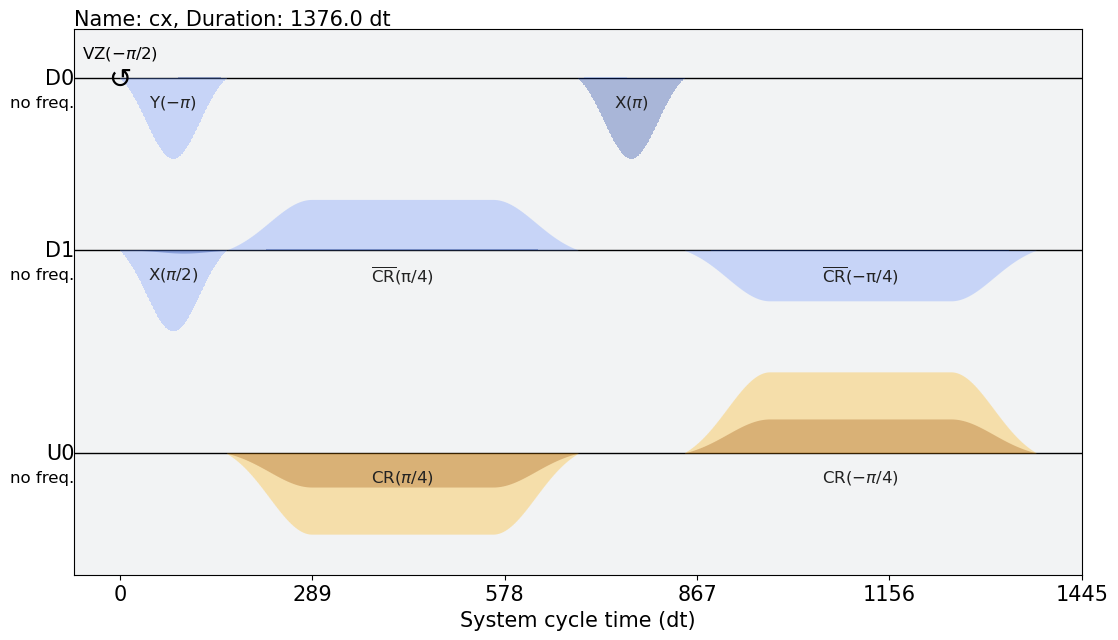

In [22]:
from qiskit import pulse


schedule = pulse.Schedule(
    (0, pulse.ShiftPhase(1.5707963267948966, pulse.DriveChannel(0))),
    (0, pulse.ShiftPhase(1.5707963267948966, pulse.ControlChannel(1))),
    (0, pulse.Play(pulse.Drag(duration=160, sigma=40, beta=0.6134080175073432, amp=-0.11930849153565498, angle=-1.5707963267948968, name='Ym_d0'), pulse.DriveChannel(0), name='Ym_d0')),
    (0, pulse.Play(pulse.Drag(duration=160, sigma=40, beta=-0.7253644338052706, amp=-0.07218089230552117, angle=0.033088254635327934, name='X90p_d1'), pulse.DriveChannel(1), name='X90p_d1')),
    (160, pulse.Play(pulse.GaussianSquare(duration=528, sigma=64, width=272, amp=0.04508032394765369, angle=0.024609105271036186, name='CR90p_d1_u0'), pulse.DriveChannel(1), name='CR90p_d1_u0')),
    (160, pulse.Play(pulse.GaussianSquare(duration=528, sigma=64, width=272, amp=0.480227045329668, angle=-2.7443844210941206, name='CR90p_u0'), pulse.ControlChannel(0), name='CR90p_u0')),
    (688, pulse.Play(pulse.Drag(duration=160, sigma=40, beta=0.6134080175073432, amp=-0.11930849153565498, angle=0.0, name='Xp_d0'), pulse.DriveChannel(0), name='Xp_d0')),
    (848, pulse.Play(pulse.GaussianSquare(duration=528, sigma=64, width=272, amp=0.04508032394765369, angle=-3.1169835483187573, name='CR90m_d1_u0'), pulse.DriveChannel(1), name='CR90m_d1_u0')),
    (848, pulse.Play(pulse.GaussianSquare(duration=528, sigma=64, width=272, amp=0.4802270453296679, angle=0.39720823249567255, name='CR90m_u0'), pulse.ControlChannel(0), name='CR90m_u0')),
    name="cx"
)



schedule.draw()

# Changing implementation time

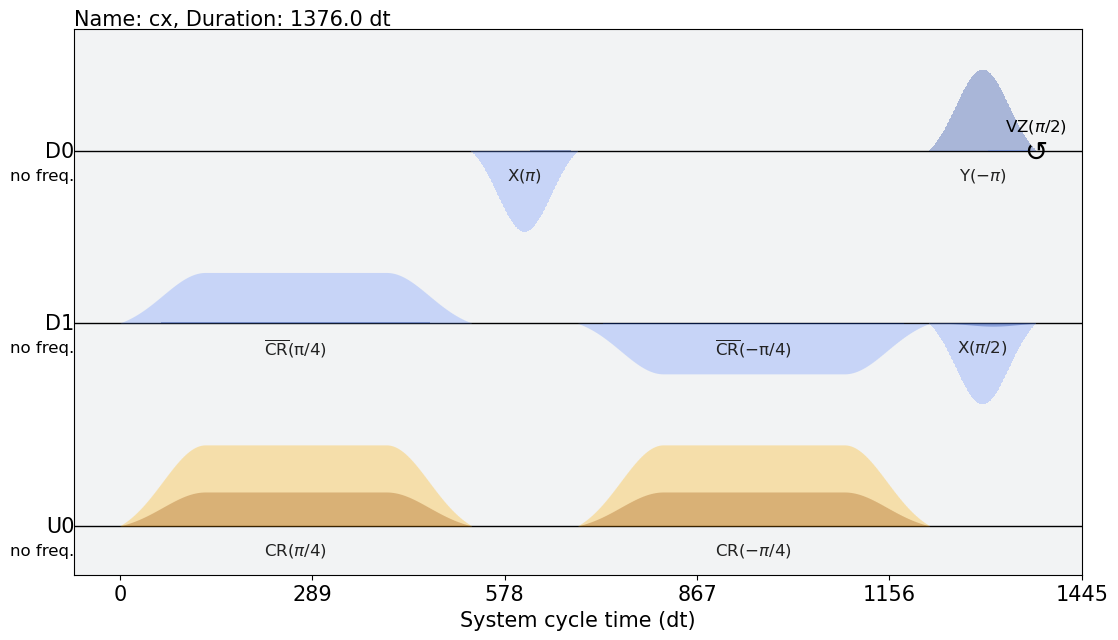

In [13]:
from qiskit import pulse


schedule = pulse.Schedule(
    (0, pulse.Play(pulse.GaussianSquare(duration=528, sigma=64, width=272, amp=0.04508032394765369, angle=0.024609105271036186, name='CR90p_d1_u0'), pulse.DriveChannel(1), name='CR90p_d1_u0')),
    (0, pulse.Play(pulse.GaussianSquare(duration=528, sigma=64, width=272, amp=-0.480227045329668, angle=-2.7443844210941206, name='CR90p_u0'), pulse.ControlChannel(0), name='CR90p_u0')),
    (528, pulse.Play(pulse.Drag(duration=160, sigma=40, beta=0.6134080175073432, amp=-0.11930849153565498, angle=0.0, name='Xp_d0'), pulse.DriveChannel(0), name='Xp_d0')),
    (688, pulse.Play(pulse.GaussianSquare(duration=528, sigma=64, width=272, amp=0.04508032394765369, angle=-3.1169835483187573, name='CR90m_d1_u0'), pulse.DriveChannel(1), name='CR90m_d1_u0')),
    (688, pulse.Play(pulse.GaussianSquare(duration=528, sigma=64, width=272, amp=0.4802270453296679, angle=0.39720823249567255, name='CR90m_u0'), pulse.ControlChannel(0), name='CR90m_u0')),
    (1216, pulse.Play(pulse.Drag(duration=160, sigma=40, beta=0.6134080175073432, amp=-0.11930849153565498, angle=-1.5707963267948968, name='Ym_d0'), pulse.DriveChannel(0), name='Ym_d0')),
    (1216, pulse.Play(pulse.Drag(duration=160, sigma=40, beta=-0.7253644338052706, amp=-0.07218089230552117, angle=0.033088254635327934, name='X90p_d1'), pulse.DriveChannel(1), name='X90p_d1')),
    (1376, pulse.ShiftPhase(1.5707963267948966, pulse.ControlChannel(1))),
    (1376, pulse.ShiftPhase(-1.5707963267948966, pulse.DriveChannel(0))),
    name="cx"
)



schedule.draw()


# Applying to actual quantum circuit

In [27]:
qc = QuantumCircuit(2)


qc.add('qubit 1 PS', 0, schedule, arguments=None)

print(qc)


AttributeError: 'QuantumCircuit' object has no attribute 'add'

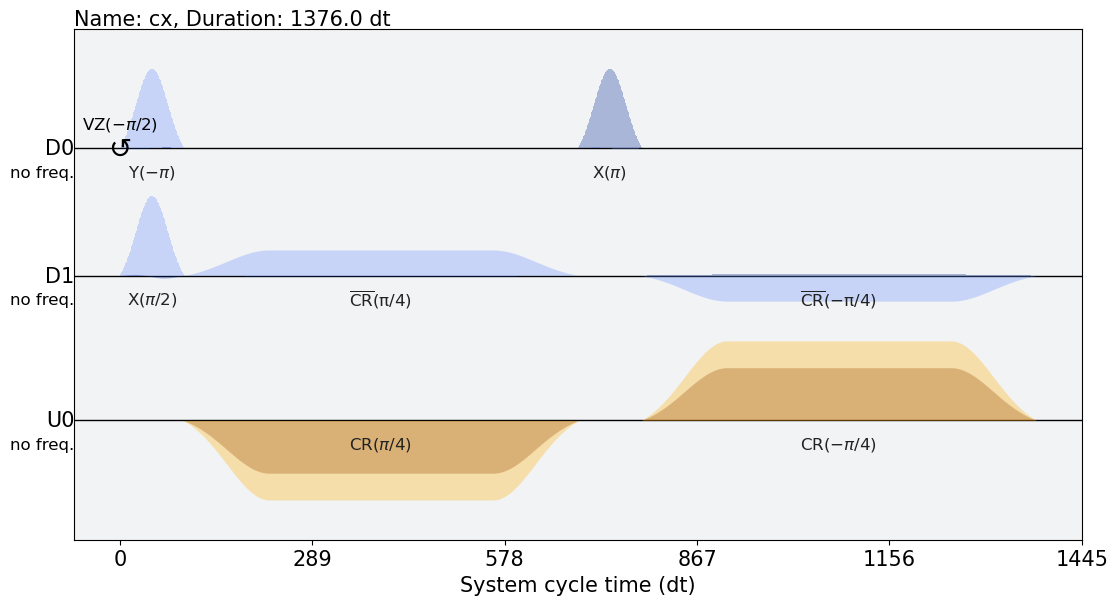

In [39]:
gate_schedule_map = backend.defaults().instruction_schedule_map

cnot_schedule = gate_schedule_map.get('cx', [0, 1])
cnot_schedule.draw()

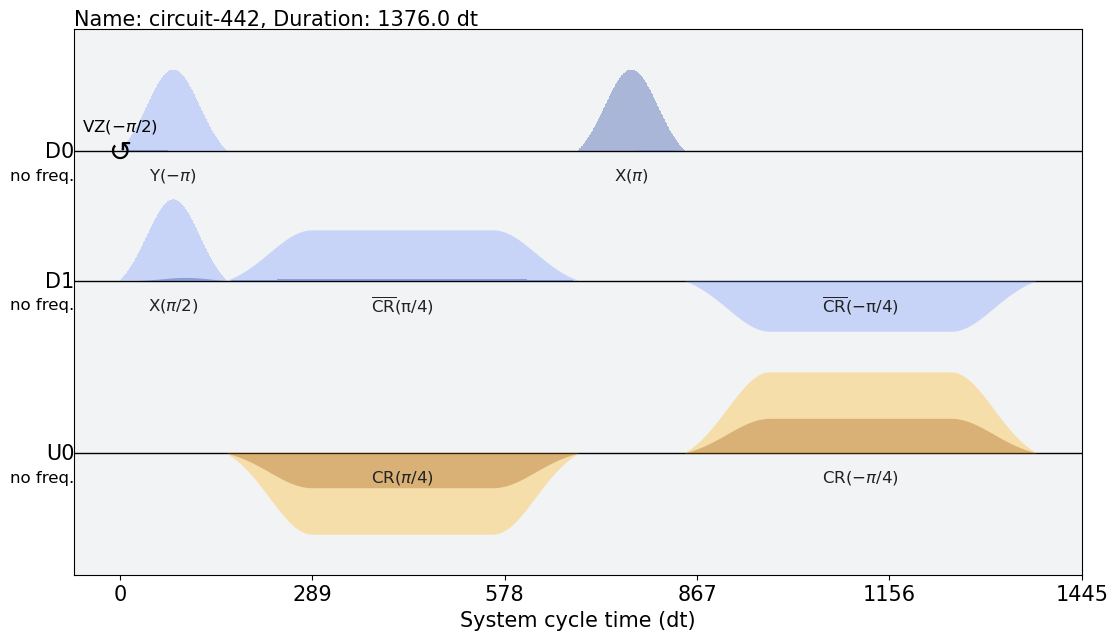

In [71]:
from qiskit import transpile, schedule as build_schedule
from qiskit.providers.fake_provider import FakeHanoi

circuit = qk.QuantumCircuit(2)
circuit.rz(-pi,1)
circuit.sx(1)
circuit.rz(pi,1)
circuit.rz(-pi/2, 0)
circuit.ecr(0,1)
circuit.rz(-pi, 0)
circuit.x(0)
circuit.rz(pi,0)


#backend = FakeHanoi()

transpiled_circ = transpile(circuit, backend, optimization_level = 1)
schedule = build_schedule(transpiled_circ, backend)

#circuit.draw("mpl")
schedule.draw()



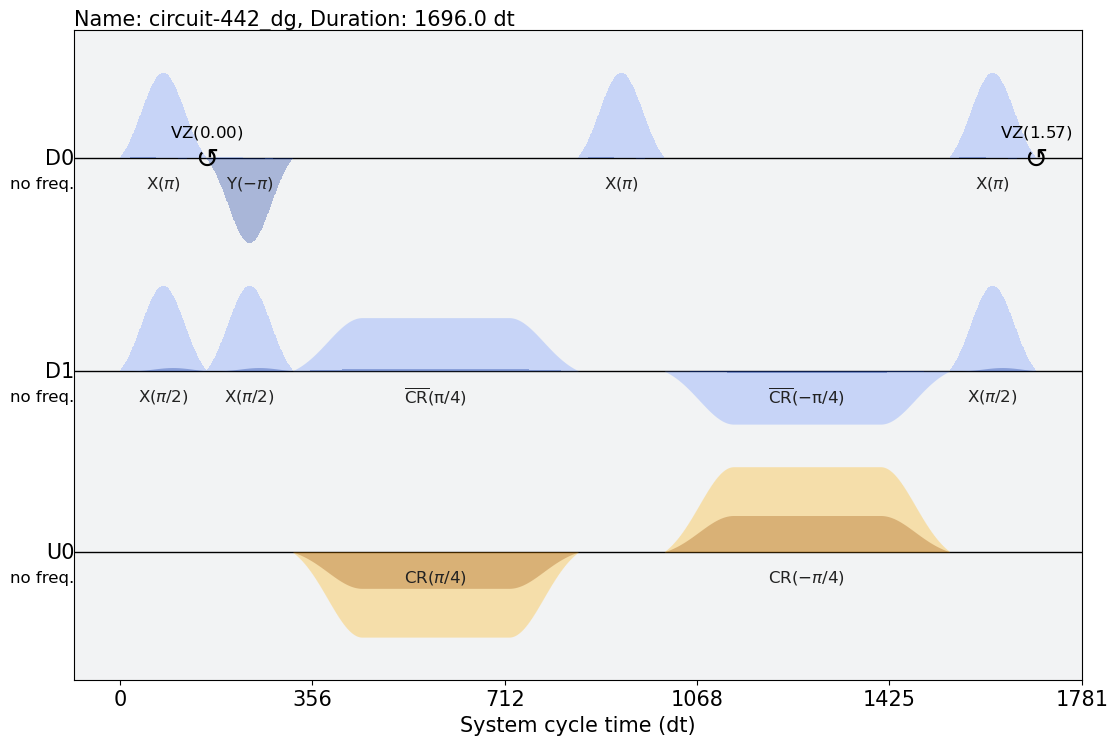

In [72]:
transpiled_circ = transpile(circuit.inverse(), backend, optimization_level = 1)
schedule = build_schedule(transpiled_circ, backend)

#circuit.inverse().draw("mpl")

schedule.draw()

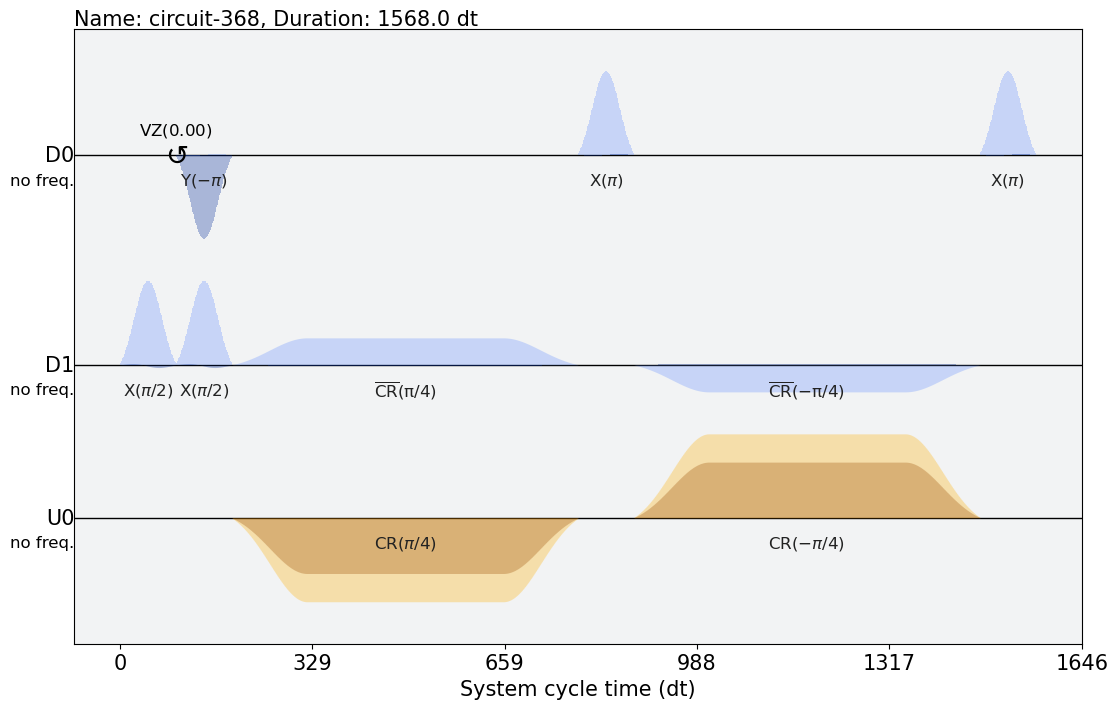

In [61]:
circ = qk.QuantumCircuit(2)
circ.ecr(0,1)
transpiled_circ = transpile(circ, backend, optimization_level = 1)

schedule = build_schedule(transpiled_circ, backend)
schedule.draw()

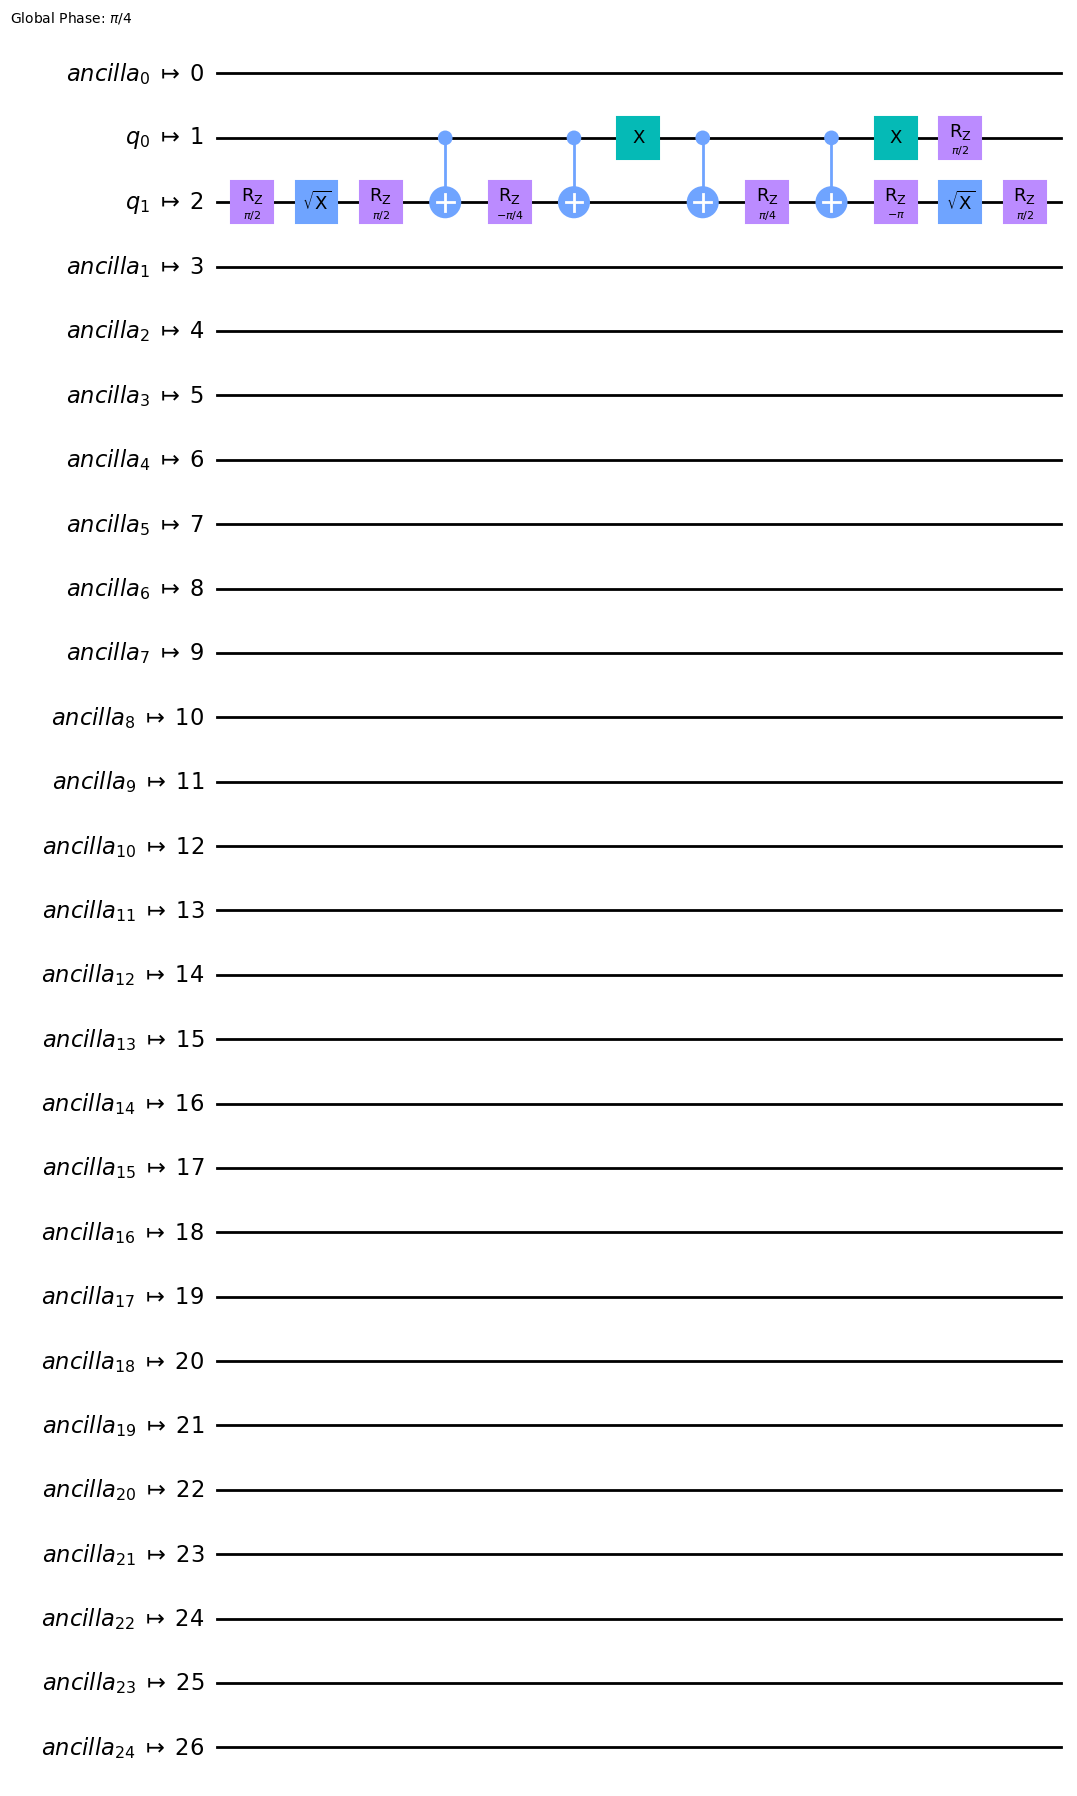

In [56]:
circ = qk.QuantumCircuit(2)

circ.rzx(-pi/4,0,1)
circ.x(0)
circ.rzx(pi/4,0,1)
circ.sx(1)
circ.ry(-pi,0)
circ.rz(-pi/2,0)


transpiled_circ = transpile(circ, backend, optimization_level = 2)
schedule = build_schedule(transpiled_circ, backend)
#schedule.draw()
transpiled_circ.draw("mpl")



# Testing CX^{-1} vs CX gate on Fake Backend

In [2]:
import numpy as np
import qiskit as qk
import pickle as pk
import qutip as qt
import matplotlib.pyplot as plt
import copy
import random
import cmath
from datetime import datetime
from math import pi
from qiskit import Aer
from qiskit.quantum_info.operators import Operator
from math import cos, sin, pi, exp
from qiskit import QuantumCircuit, transpile, assemble

from qiskit.quantum_info.operators import Operator, Pauli
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit_ibm_provider import IBMProvider
%matplotlib inline

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit import IBMQ
from qiskit.visualization import SchedStyle
import numpy as np

token = '1ea127d77db5ded729da86b734cd00aee46e09a897dae34eca01882ea1fed1f750298c01b855d8a419c4015fb87f6d38b7c40bc6854f78060128f75740d6b3f5'
try:
    IBMQ.load_account()
except:
    qk.IBMQ.save_account(token=token)
    qk.IBMQ.enable_account(token)
provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
 

ibmqfactory.load_account:WARNING:2023-09-06 23:00:38,138: Credentials are already in use. The existing account in the session will be replaced.
configrc.store_credentials:WARNING:2023-09-06 23:00:38,359: Credentials already present. Set overwrite=True to overwrite.


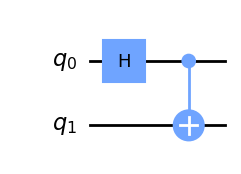

In [11]:
circ = qk.QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.draw("mpl")

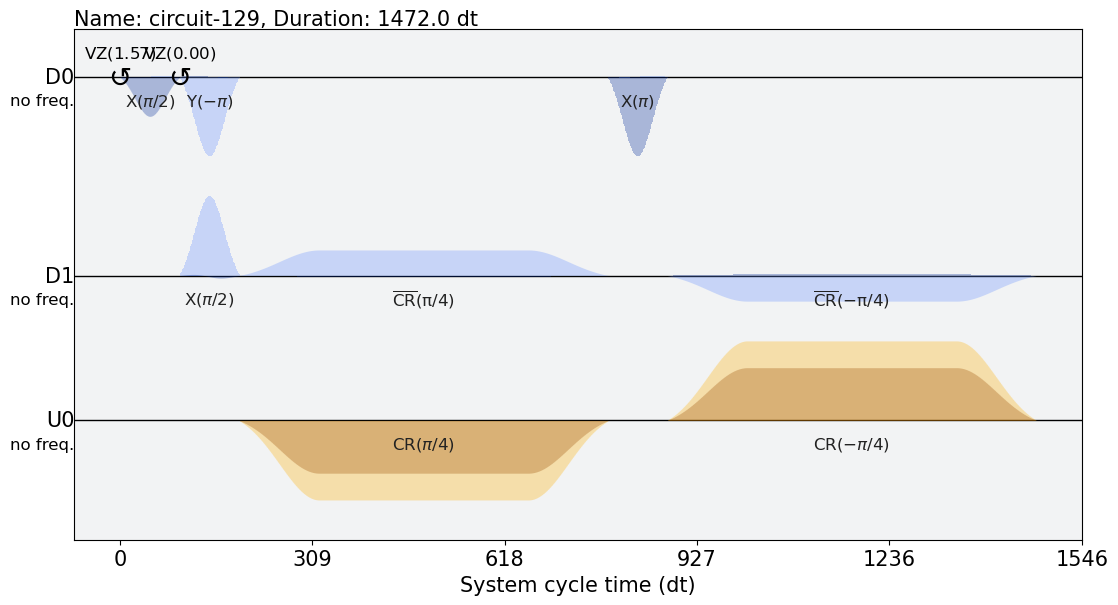

In [13]:
from qiskit import transpile, schedule as build_schedule
from qiskit.providers.fake_provider import FakeHanoi

backend = FakeHanoi()

transpiled_circ = transpile(circ, backend, optimization_level = 0)
schedule = build_schedule(transpiled_circ, backend)

schedule.draw()

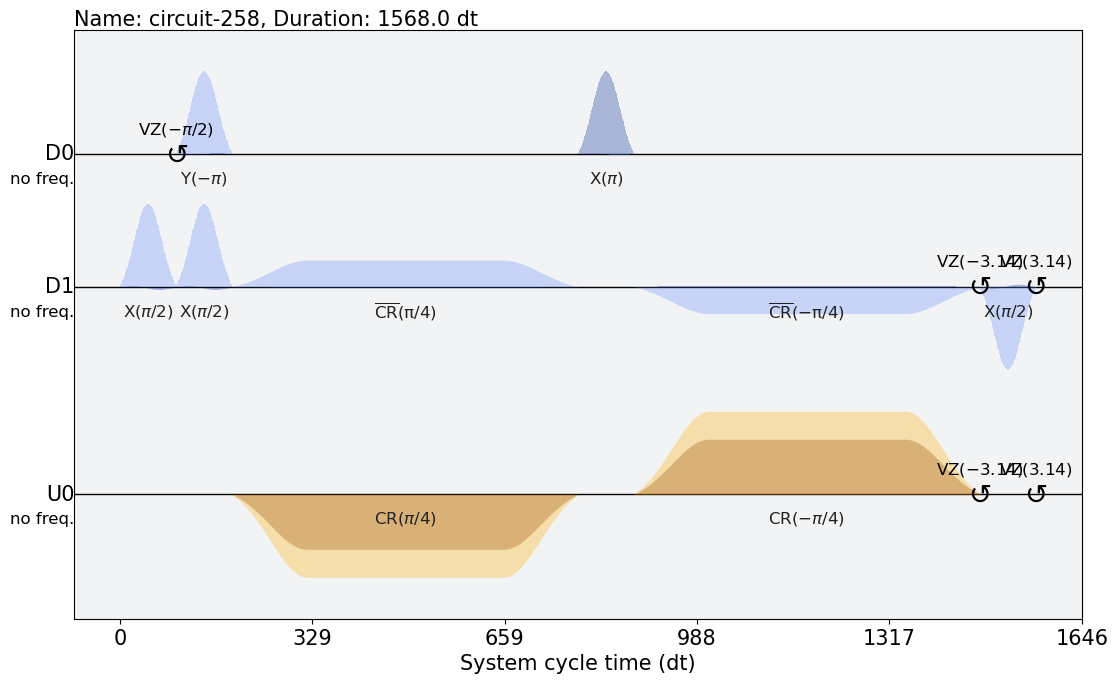

In [38]:
invcirc = qk.QuantumCircuit(2)


invcirc.rz(-pi/2, 0)
invcirc.ecr(0,1)
invcirc.rz(-pi, 0)
invcirc.x(0)
invcirc.rz(pi,0)
invcirc.rz(-pi,1)
invcirc.sx(1)
invcirc.rz(pi,1)




transpiled_circ = transpile(invcirc, backend, optimization_level = 1)
schedule = build_schedule(transpiled_circ, backend)

schedule.draw()